# Classification


In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Star Dataset

We use a variation of the star data. Each star is classified into one of 6 categories 0 to 5, based on a set of explanatory attributes. 

In [3]:
data =  pd.read_csv('./data/6 class csv.csv', header=None, low_memory=False)
data.columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
                'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']

data = data.drop(0)
print('Number of instances = %d' % data.shape[0])
print('Number of attributes = %d' % data.shape[1])
data.head()

Number of instances = 240
Number of attributes = 7


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
1,3068,0.0024,0.17,16.12,0,Red,M
2,3042,0.0005,0.1542,16.6,0,Red,M
3,2600,0.0003,0.102,18.7,0,Red,M
4,2800,0.0002,0.16,16.65,0,Red,M
5,1939,0.000138,0.103,20.06,0,Red,M


# 2. Data Preprocessing

Before starting the star classification, we have to preprocess our dataset.

In [4]:
#change string type attribute to float or int type 
data['Temperature (K)'] = data['Temperature (K)'].astype(int)
data['Luminosity(L/Lo)'] = data['Luminosity(L/Lo)'].astype(float)
data['Radius(R/Ro)'] = data['Radius(R/Ro)'].astype(float)
data['Absolute magnitude(Mv)'] = data['Absolute magnitude(Mv)'].astype(float)
data['Star type'] = data['Star type'].astype(int)
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
1,3068,0.002400,0.1700,16.12,0,Red,M
2,3042,0.000500,0.1542,16.60,0,Red,M
3,2600,0.000300,0.1020,18.70,0,Red,M
4,2800,0.000200,0.1600,16.65,0,Red,M
5,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
236,38940,374830.000000,1356.0000,-9.93,5,Blue,O
237,30839,834042.000000,1194.0000,-10.63,5,Blue,O
238,8829,537493.000000,1423.0000,-10.73,5,White,A
239,9235,404940.000000,1112.0000,-11.23,5,White,A


## 2.1 Missing Values

In [5]:
print('Number of instances = %d' % data.shape[0])
print('Number of attributes = %d' % data.shape[1])

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))

Number of instances = 240
Number of attributes = 7
Number of missing values:
	Temperature (K): 0
	Luminosity(L/Lo): 0
	Radius(R/Ro): 0
	Absolute magnitude(Mv): 0
	Star type: 0
	Star color: 0
	Spectral Class: 0


There is no missing values in our dataset

## 2.2 Outliers

In [6]:
#drop 'string' type attribute to draw boxplot
data2 = data.drop(['Star color', 'Spectral Class'], axis=1)
data2

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
1,3068,0.002400,0.1700,16.12,0
2,3042,0.000500,0.1542,16.60,0
3,2600,0.000300,0.1020,18.70,0
4,2800,0.000200,0.1600,16.65,0
5,1939,0.000138,0.1030,20.06,0
...,...,...,...,...,...
236,38940,374830.000000,1356.0000,-9.93,5
237,30839,834042.000000,1194.0000,-10.63,5
238,8829,537493.000000,1423.0000,-10.73,5
239,9235,404940.000000,1112.0000,-11.23,5


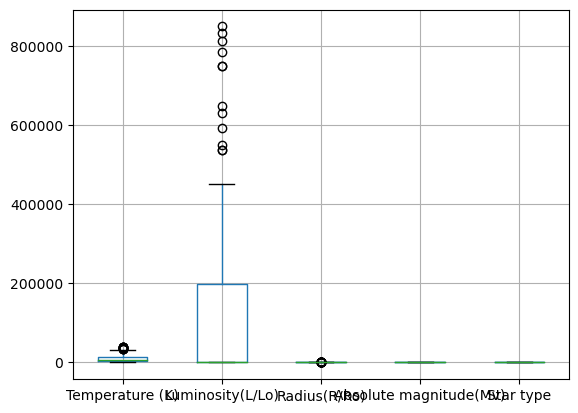

In [7]:
#show boxplot to detect outliers
data2.boxplot()
plt.show()

In [8]:
# Z-score
z = (data2-data2.mean())/data2.std()
z

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
1,-0.777757,-0.597375,-0.458252,1.114416,-1.460797
2,-0.780479,-0.597375,-0.458283,1.159990,-1.460797
3,-0.826749,-0.597375,-0.458384,1.359372,-1.460797
4,-0.805812,-0.597375,-0.458272,1.164737,-1.460797
5,-0.895947,-0.597375,-0.458382,1.488496,-1.460797
...,...,...,...,...,...
236,2.977520,1.491603,2.163453,-1.358878,1.460797
237,2.129463,4.050853,1.850201,-1.425339,1.460797
238,-0.174664,2.398146,2.293008,-1.434833,1.460797
239,-0.132161,1.659410,1.691642,-1.482305,1.460797


In [9]:
#add new columns with each z score corresponding the attribute
data['z_score_K'] = z['Temperature (K)']
data['z_score_L'] = z['Luminosity(L/Lo)']
data['z_score_R'] = z['Radius(R/Ro)']
data['z_score_Mv'] = z['Absolute magnitude(Mv)']
data['z_score_type'] = z['Star type']
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,z_score_K,z_score_L,z_score_R,z_score_Mv,z_score_type
1,3068,0.002400,0.1700,16.12,0,Red,M,-0.777757,-0.597375,-0.458252,1.114416,-1.460797
2,3042,0.000500,0.1542,16.60,0,Red,M,-0.780479,-0.597375,-0.458283,1.159990,-1.460797
3,2600,0.000300,0.1020,18.70,0,Red,M,-0.826749,-0.597375,-0.458384,1.359372,-1.460797
4,2800,0.000200,0.1600,16.65,0,Red,M,-0.805812,-0.597375,-0.458272,1.164737,-1.460797
5,1939,0.000138,0.1030,20.06,0,Red,M,-0.895947,-0.597375,-0.458382,1.488496,-1.460797
...,...,...,...,...,...,...,...,...,...,...,...,...
236,38940,374830.000000,1356.0000,-9.93,5,Blue,O,2.977520,1.491603,2.163453,-1.358878,1.460797
237,30839,834042.000000,1194.0000,-10.63,5,Blue,O,2.129463,4.050853,1.850201,-1.425339,1.460797
238,8829,537493.000000,1423.0000,-10.73,5,White,A,-0.174664,2.398146,2.293008,-1.434833,1.460797
239,9235,404940.000000,1112.0000,-11.23,5,White,A,-0.132161,1.659410,1.691642,-1.482305,1.460797


We consider the outlier if the Z score of each attribute was less than -3 or greater than 3.

So, we exclude the outliers in our dataset.

In [10]:
#exclude outliers in our dataset
data = data[data['z_score_K'].between(-3, 3)]
data = data[data['z_score_L'].between(-3, 3)]
data = data[data['z_score_R'].between(-3, 3)]
data = data[data['z_score_Mv'].between(-3, 3)]
data = data[data['z_score_type'].between(-3, 3)]

data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,z_score_K,z_score_L,z_score_R,z_score_Mv,z_score_type
1,3068,0.002400,0.1700,16.12,0,Red,M,-0.777757,-0.597375,-0.458252,1.114416,-1.460797
2,3042,0.000500,0.1542,16.60,0,Red,M,-0.780479,-0.597375,-0.458283,1.159990,-1.460797
3,2600,0.000300,0.1020,18.70,0,Red,M,-0.826749,-0.597375,-0.458384,1.359372,-1.460797
4,2800,0.000200,0.1600,16.65,0,Red,M,-0.805812,-0.597375,-0.458272,1.164737,-1.460797
5,1939,0.000138,0.1030,20.06,0,Red,M,-0.895947,-0.597375,-0.458382,1.488496,-1.460797
...,...,...,...,...,...,...,...,...,...,...,...,...
232,38234,272830.000000,1356.0000,-9.29,5,Blue,O,2.903612,0.923143,2.163453,-1.298113,1.460797
236,38940,374830.000000,1356.0000,-9.93,5,Blue,O,2.977520,1.491603,2.163453,-1.358878,1.460797
238,8829,537493.000000,1423.0000,-10.73,5,White,A,-0.174664,2.398146,2.293008,-1.434833,1.460797
239,9235,404940.000000,1112.0000,-11.23,5,White,A,-0.132161,1.659410,1.691642,-1.482305,1.460797


In [11]:
#delete Z score columns in a dataset
data = data.drop(columns=['z_score_K', 'z_score_L', 'z_score_R', 'z_score_Mv', 'z_score_type'], axis=1)
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
1,3068,0.002400,0.1700,16.12,0,Red,M
2,3042,0.000500,0.1542,16.60,0,Red,M
3,2600,0.000300,0.1020,18.70,0,Red,M
4,2800,0.000200,0.1600,16.65,0,Red,M
5,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
232,38234,272830.000000,1356.0000,-9.29,5,Blue,O
236,38940,374830.000000,1356.0000,-9.93,5,Blue,O
238,8829,537493.000000,1423.0000,-10.73,5,White,A
239,9235,404940.000000,1112.0000,-11.23,5,White,A


## 2.3 Duplicated Data

In [12]:
#check any duplicated data
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


There is no duplicated data in our dataset.

## 2.4 Correlation Plot

By using correlation plot, it is possible to grasp the relationship between attributes.

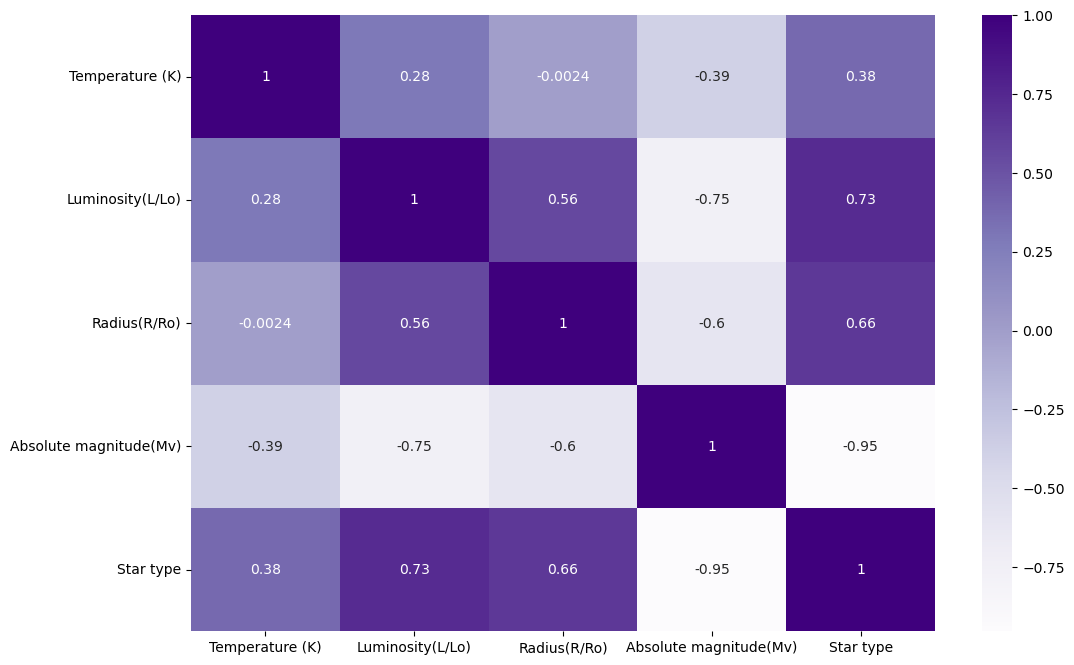

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True, cmap = 'Purples')
plt.show()

From the plot above, we can see that properties Luminosity and Star type are highly correlated. 

Also, the attributes Radius and Star type are highly correlated.

# 3. Classificatoin

## 3.1 Star Dataset

In [14]:
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
1,3068,0.002400,0.1700,16.12,0,Red,M
2,3042,0.000500,0.1542,16.60,0,Red,M
3,2600,0.000300,0.1020,18.70,0,Red,M
4,2800,0.000200,0.1600,16.65,0,Red,M
5,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
232,38234,272830.000000,1356.0000,-9.29,5,Blue,O
236,38940,374830.000000,1356.0000,-9.93,5,Blue,O
238,8829,537493.000000,1423.0000,-10.73,5,White,A
239,9235,404940.000000,1112.0000,-11.23,5,White,A


To do classification, we drop or change 'string' type attributes.

'Star color' column is dropped.

'Spectral class' column is converted into indicator variables which help to classify the star dataset.

In [15]:
#drop or change 'string' type attributes to do classification
data = data.drop('Star color',axis=1)

spectral_class = pd.get_dummies(data['Spectral Class'],drop_first=False)
data.drop('Spectral Class',axis=1,inplace=True)
data = pd.concat([data, spectral_class],axis=1)

data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,A,B,F,G,K,M,O
1,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,1,0
2,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,1,0
3,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,1,0
4,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,1,0
5,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
232,38234,272830.000000,1356.0000,-9.29,5,0,0,0,0,0,0,1
236,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,0,1
238,8829,537493.000000,1423.0000,-10.73,5,1,0,0,0,0,0,0
239,9235,404940.000000,1112.0000,-11.23,5,1,0,0,0,0,0,0


## 3.2 Decision Tree Classifier

In this section, we apply a decision tree classifier to the star dataset described in the previous subsection.

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('Star type',axis=1),data['Star type'],test_size=0.30,random_state=1004)

The 'train_test_split' funcition distinguishes a train set and test set from the star dataset.

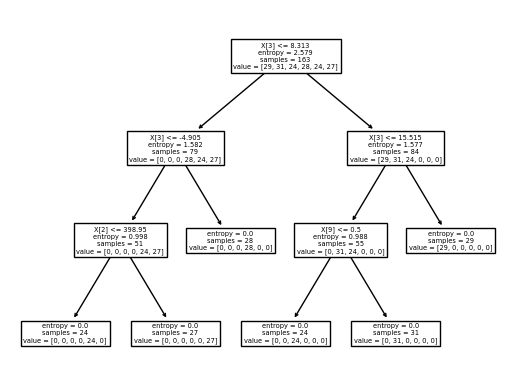

In [17]:
from sklearn import tree

dtree= tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred_labels_dtree = dtree.predict(x_test)

tree.plot_tree(dtree)
plt.show()

Then, we create a decision tree classifier object using entropy as its impurity measure for splitting criterion.
Next, the classifier is trained on the labeled data using the fit() function.
We can plot the resulting decision tree obtained after training the classifier.

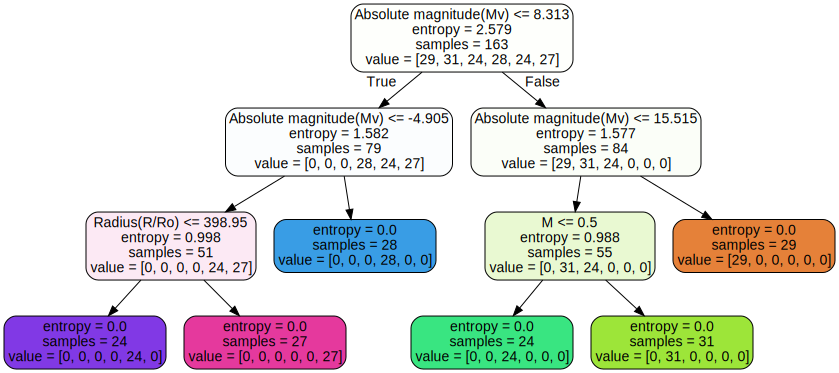

In [18]:
import pydotplus, graphviz
from IPython.display import Image
from sklearn import tree

data_feat = data.drop('Star type',axis=1)
features= list(data_feat.columns)

dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=features, filled=True, rounded=True,)
graphviz.Source(dot_data) 

Next, suppose we apply the decision tree to classify the following 8 test examples.

In [19]:
testData = [[3000, 0.002, 0.17, 16, 0, 0, 0, 0, 0, 0, 1, 0],
           [1900, 0.0001, 0.1, 20, 0, 0, 0, 0, 0, 0, 1, 0],
           [9000, 404900, 1112, -11, 5, 1, 0, 0, 0, 0, 0, 0],
           [38000, 300000, 1356, -9, 5, 0, 0, 0, 0, 0, 0, 1],
           [8000, 537000, 1400, -10, 5, 1, 0, 0, 0, 0, 0, 0],
           [3666, 313000, 1300, -7, 5, 0, 0, 0, 0, 0, 1, 0],
           [17000, 0.001, 0.0101, 11, 2, 0, 1, 0, 0, 0, 0, 0],
           [24000, 0.0015, 0.01, 11, 2, 0, 1, 0, 0, 0, 0, 0]]

testData = pd.DataFrame(testData, columns=data.columns)
testData

testY = testData['Star type']
testX = testData.drop(['Star type'],axis=1)

predY = dtree.predict(testX)
predictions = pd.concat([testData,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,A,B,F,G,K,M,O,Predicted Class
0,3000,0.0020,0.1700,16,0,0,0,0,0,0,1,0,0
1,1900,0.0001,0.1000,20,0,0,0,0,0,0,1,0,0
2,9000,404900.0000,1112.0000,-11,5,1,0,0,0,0,0,0,5
3,38000,300000.0000,1356.0000,-9,5,0,0,0,0,0,0,1,5
4,8000,537000.0000,1400.0000,-10,5,1,0,0,0,0,0,0,5
5,3666,313000.0000,1300.0000,-7,5,0,0,0,0,0,1,0,5
6,17000,0.0010,0.0101,11,2,0,1,0,0,0,0,0,2
7,24000,0.0015,0.0100,11,2,0,1,0,0,0,0,0,2


Except for sixth row, which class is 5,the classifier correctly predicts the class label of the test examples. We can calculate the accuracy of the classifier on the test data as shown by the example given below.

In [128]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.88


## 3.3. Alternative Classification Techniques

Besides decision tree classifier, the Python sklearn library also supports other classification techniques. In this section, we try to use other techniques, using ensemble methods.

An ensemble classifier constructs a set of base classifiers from the training data and performs classification by taking a vote on the predictions made by each base classifier. We consider 2 types of ensemble classifiers in this example: bagging, and random forest.

### 3.3.1 Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

trainAcc = []
testAcc = []

clf = RandomForestClassifier(random_state=104)
clf.fit(x_train, y_train)
y_predTrain = clf.predict(x_train)
y_predTest = clf.predict(x_test)

trainAcc.append(accuracy_score(y_train, y_predTrain))
testAcc.append(accuracy_score(y_test, y_predTest))

### 3.3.2 Bagging Classifier

In [135]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(random_state=104)
clf.fit(x_train, y_train)
y_predTrain = clf.predict(x_train)
y_predTest = clf.predict(x_test)

trainAcc.append(accuracy_score(y_train, y_predTrain))
testAcc.append(accuracy_score(y_test, y_predTest))

### 3.3.3 Validatoin

In [136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10)

dtree = tree.DecisionTreeClassifier()
clf = RandomForestClassifier()
bag = BaggingClassifier()

tree_score = cross_val_score(dtree, data.drop('Star type',axis=1), data['Star type'], cv=kf)
rt_score = cross_val_score(clf, data.drop('Star type',axis=1), data['Star type'], cv=kf)
bg_score = cross_val_score(bag, data.drop('Star type',axis=1), data['Star type'], cv=kf)

# Mean of all the score arrays
print("Decision Tree:", np.mean(tree_score), "Random Forest:", np.mean(rt_score), "Bgging:", np.mean(bg_score))

Decision Tree: 1.0 Random Forest: 0.9869565217391305 Bgging: 0.9913043478260869


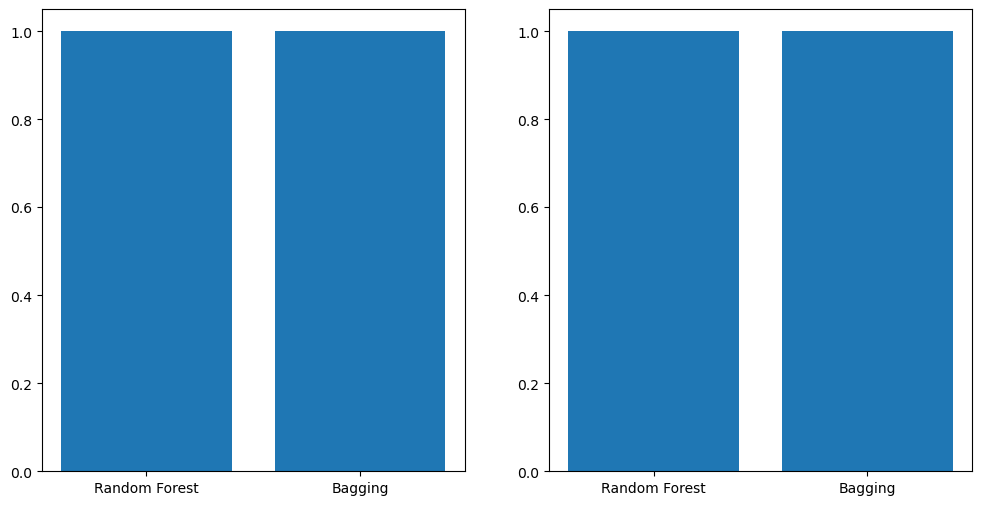

In [139]:
methods = ['Random Forest', 'Bagging']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5], trainAcc)
ax1.set_xticks([1.5,2.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5], testAcc)
ax2.set_xticks([1.5,2.5])
ax2.set_xticklabels(methods)
plt.show()

## 3.4 Summary

We performed classification with a star dataset. 
From the correlation plot, it was found that the type of star was highly correlated with the light Absolute magnitude, Luminosity and Radius. And after performing several classifications, it was confirmed that the classification accuracy was very high. It can be assumed that this is because the method for finding the type of star is highly impacted by that values. So we are happy with the result !